<a href="https://colab.research.google.com/github/rerebebeccacca/20210602class/blob/main/classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd #
from sklearn.datasets import load_iris #從sklearn.datasets讀取辨識鳶野花
iris = load_iris() #讀取
# DataFrame:表格，Series:一行/一列
df=pd.DataFrame(iris["data"],
             columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv",encoding="utf-8",index=False) 
#存成csv的檔案（csv資料為每筆中間用逗點隔開）
#必打encoding，utf-8是萬國編碼（不用的話會顯現預設編碼ansi)
#index那邊不要顯示0~149

df #印出jupyter表格（比較美）
#print(df) #印出較醜的表格


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# df_new = df.drop(["ans"],axis=1) #axis是雙向的

In [22]:
# sklearn 前：pandas.DataFrame
# sklearn 後：np.array(多維的東西，一般二維list不用這個) 
import numpy as np
from sklearn.model_selection import train_test_split
x,y= np.array(df.drop(["ans"],axis=1)), np.array(df["ans"])
# train_test_split([1,2,3,4],
#                  [5,6,7,8],
#                  test_size=0.25) #test_size把資料分成75%學習25%測試

#分成90% x,10% x, 90% y,10% y
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [25]:
#決策樹
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) #任何演算法訓練限制最大深度就好（不要學太好）
clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 489.24, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [46, 43, 46]\nclass = setosa'),
 Text(236.07692307692307, 380.52000000000004, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 380.52000000000004, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 89\nvalue = [0, 43, 46]\nclass = virginica'),
 Text(171.69230769230768, 271.8, 'petal length (cm) <= 4.95\ngini = 0.19\nsamples = 47\nvalue = [0, 42, 5]\nclass = versicolor'),
 Text(85.84615384615384, 163.08000000000004, 'petal width (cm) <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(42.92307692307692, 54.360000000000014, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(128.76923076923077, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 163.08000000000004, 'petal width (cm) <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virgi

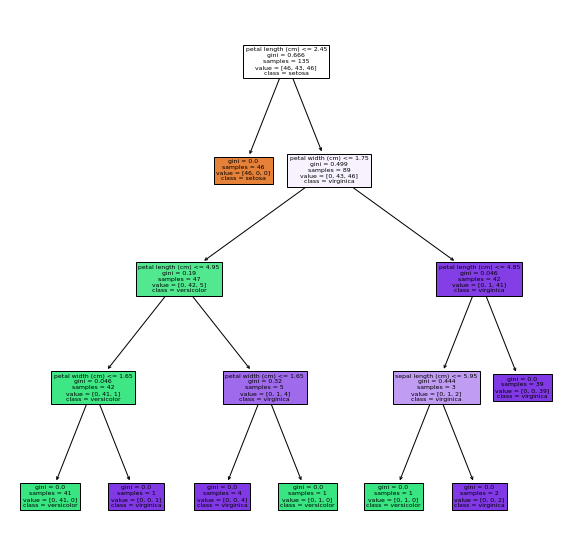

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [33]:
from sklearn.metrics import accuracy_score #metrics度量標準
#去預測
pre = clf.predict(x_test)
accuracy_score(pre,y_test)


0.9333333333333333